In [1]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# loading datasets
customers=pd.read_csv('olist_customers_dataset.csv')
sellers=pd.read_csv('olist_sellers_dataset.csv')
order_reviews=pd.read_csv('olist_order_reviews_dataset.csv')
order_items=pd.read_csv('olist_order_items_dataset.csv')
products=pd.read_csv('olist_products_dataset.csv')

In [3]:
geolocation = pd.read_csv('olist_geolocation_dataset.csv')
product_category = pd.read_csv('product_category_name_translation.csv')
orders = pd.read_csv('olist_orders_dataset.csv')
payments = pd.read_csv('olist_order_payments_dataset.csv')

In [4]:
# storing all datasets as a list for future reference

list_of_all_datasets=['customers','sellers','order_reviews','order_items','products','geolocation','product_category',
                      'orders','payments']

### Analysis of Customers Data

In [5]:
# print top 5 values
customers.head(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [6]:
customers.shape

(99441, 5)

In [7]:
customers.isnull().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

#### We can see that there is no null value in Customers dataset
#### Now, we will try to find no of unique states and city from the Customers Dataset

In [8]:
customers.customer_city.unique()

array(['franca', 'sao bernardo do campo', 'sao paulo', ...,
       'monte bonito', 'sao rafael', 'eugenio de castro'], dtype=object)

In [9]:
len(customers.customer_city.unique())

4119

#### There are total 4119 different Cities from where Customers visit

In [10]:
customers.customer_state.unique()

array(['SP', 'SC', 'MG', 'PR', 'RJ', 'RS', 'PA', 'GO', 'ES', 'BA', 'MA',
       'MS', 'CE', 'DF', 'RN', 'PE', 'MT', 'AM', 'AP', 'AL', 'RO', 'PB',
       'TO', 'PI', 'AC', 'SE', 'RR'], dtype=object)

In [11]:
len(customers.customer_state.unique())

27

### Visualisation of Customer Dataset

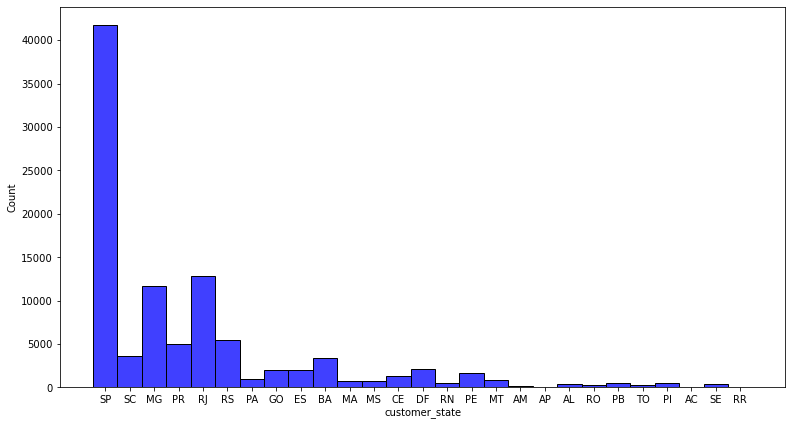

In [12]:
plt.figure(figsize=(13,7))
sns.histplot(x=customers['customer_state'],data=customers,color='blue')
plt.show()

#### From above histogram, we can see that most numbers of customer are from SP (Sao Paul) state,followed by Rj (Rio de Janeiro) state.

In [13]:
top_10_cities=customers['customer_city'].value_counts().nlargest(10)
top_10_cities

sao paulo                15540
rio de janeiro            6882
belo horizonte            2773
brasilia                  2131
curitiba                  1521
campinas                  1444
porto alegre              1379
salvador                  1245
guarulhos                 1189
sao bernardo do campo      938
Name: customer_city, dtype: int64

In [14]:
cities=customers['customer_city'].value_counts(ascending=True)
cities[0:20]

desterro do melo        1
lucena                  1
vargem grande           1
ferreiros               1
fonseca                 1
santa cruz do timbo     1
lagoa salgada           1
caparao                 1
sao pedro do iguacu     1
murici                  1
guarapua                1
dom cavati              1
rosario do ivai         1
arapoema                1
pereiras                1
brejo dos santos        1
conselheiro mairinck    1
combinado               1
duas barras             1
datas                   1
Name: customer_city, dtype: int64

#### We can see that there are so many cites with count 1, they can be said to be city with least customers

In [15]:
city_df=customers.groupby('customer_city').count()['customer_id'].reset_index()

Text(0, 0.5, 'Number of Customers')

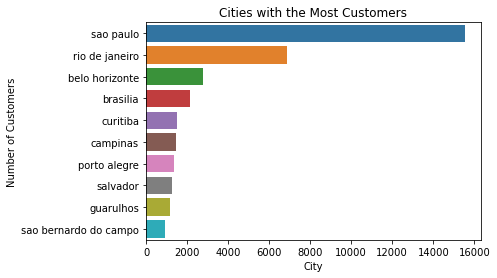

In [16]:
sns.barplot(data = city_df.sort_values('customer_id', ascending = False).nlargest(10,'customer_id'), x = 'customer_id', 
            y = 'customer_city',)
plt.title('Cities with the Most Customers')
plt.xlabel('City')
plt.ylabel('Number of Customers')

##### Again the city with most no of customers is Sao Paulo, followed by rio de janeiro

### Analyis of products and items

In [17]:
products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [18]:
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


#### From above two datasets, we can see that we can 'inner join' these datasets on products id, Lets see

In [19]:
products_and_order_items_df=pd.merge(order_items,products)

In [20]:
products_and_order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
1,130898c0987d1801452a8ed92a670612,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-07-05 02:44:11,55.9,17.96,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
2,532ed5e14e24ae1f0d735b91524b98b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2018-05-23 10:56:25,64.9,18.33,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
3,6f8c31653edb8c83e1a739408b5ff750,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-07 18:55:08,58.9,16.17,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
4,7d19f4ef4d04461989632411b7e588b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-16 22:05:11,58.9,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0


In [21]:
top_10_products=products_and_order_items_df['product_category_name'].value_counts().reset_index().nlargest(10, 'product_category_name')

In [22]:
lowest_10_products=products_and_order_items_df['product_category_name'].value_counts().reset_index().nsmallest(10, 'product_category_name')

In [23]:
top_10_products

,index,product_category_name
0,cama_mesa_banho,11115
1,beleza_saude,9670
2,esporte_lazer,8641
3,moveis_decoracao,8334
4,informatica_acessorios,7827
5,utilidades_domesticas,6964
6,relogios_presentes,5991
7,telefonia,4545
8,ferramentas_jardim,4347
9,automotivo,4235


In [24]:
lowest_10_products

,index,product_category_name
72,seguros_e_servicos,2
71,fashion_roupa_infanto_juvenil,8
70,pc_gamer,9
68,la_cuisine,14
69,cds_dvds_musicais,14
67,portateis_cozinha_e_preparadores_de_alimentos,15
66,artes_e_artesanato,24
64,fashion_esporte,30
65,casa_conforto_2,30
63,flores,33


### Payments Analysis

In [25]:
payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [26]:
payments.payment_type.unique()

array(['credit_card', 'boleto', 'voucher', 'debit_card', 'not_defined'],
      dtype=object)

#### There are bascially 5 types of payment methods used by the customers

In [27]:
top_payment_type = payments['payment_type'].value_counts(ascending=False)

In [28]:
top_payment_type

credit_card    76795
boleto         19784
voucher         5775
debit_card      1529
not_defined        3
Name: payment_type, dtype: int64

#### Out of 5 types of methods, credit card is used on the top, then boleto and then voucher

In [29]:
type(top_payment_type)

pandas.core.series.Series

#### Since this is a series object we can draw a histplot using its index and values

In [30]:
a = top_payment_type.index

In [31]:
b = top_payment_type.values

<AxesSubplot:>

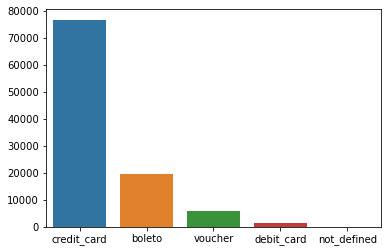

In [32]:
sns.barplot(x=a,y=b)

##### From the above bar graph we can see that,uses of Credit Card is the highest aroud 75000, then boleto that is slightly less than 20000, 

### Products Reviews

In [33]:
# we will first see if there is any relation between our product_and_order_items_df, and order_reviews
products_and_order_items_df.head(3)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
1,130898c0987d1801452a8ed92a670612,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-07-05 02:44:11,55.9,17.96,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
2,532ed5e14e24ae1f0d735b91524b98b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2018-05-23 10:56:25,64.9,18.33,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0


In [34]:
# printing top 3 rows or order_reviews
order_reviews.head(3)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24


#### We can join it based on order_id column which is common to both, for this we will make another dataframe named "reviews_df'

In [35]:
reviews_df=pd.merge(products_and_order_items_df, order_reviews)

In [36]:
reviews_df.head(3)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,...,product_weight_g,product_length_cm,product_height_cm,product_width_cm,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,cool_stuff,58.0,598.0,...,650.0,28.0,9.0,14.0,97ca439bc427b48bc1cd7177abe71365,5,NaN,"Perfeito, produto entregue antes do combinado.",2017-09-21 00:00:00,2017-09-22 10:57:03
1,130898c0987d1801452a8ed92a670612,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-07-05 02:44:11,55.9,17.96,cool_stuff,58.0,598.0,...,650.0,28.0,9.0,14.0,b11cba360bbe71410c291b764753d37f,5,NaN,"lannister como sempre, entregou certinho e den...",2017-07-14 00:00:00,2017-07-17 12:50:07
2,532ed5e14e24ae1f0d735b91524b98b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2018-05-23 10:56:25,64.9,18.33,cool_stuff,58.0,598.0,...,650.0,28.0,9.0,14.0,af01c4017c5ab46df6cc810e069e654a,4,super recomendo,carrinho muito bonito,2018-06-05 00:00:00,2018-06-06 21:41:12


In [37]:
reviews_df.shape

(113322, 21)

In [38]:
order_reviews['review_score'].value_counts()

5    57420
4    19200
1    11858
3     8287
2     3235
Name: review_score, dtype: int64

In [39]:
order_reviews['review_score'].unique()

array([4, 5, 1, 3, 2], dtype=int64)

#### Ratings points are discrete, starting from 1 to 5.

Text(0, 0.5, 'Counts')

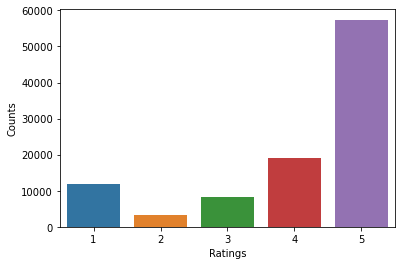

In [40]:
sns.barplot(x=order_reviews['review_score'].value_counts().index,y=order_reviews['review_score'].value_counts().values)
plt.xlabel('Ratings')
plt.ylabel('Counts')

Most of the products have been rated 5,then 4.
also 1 rating is higher than 2 and 3


### Top Ten rated products

In [41]:
reviews_df.head(3)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,...,product_weight_g,product_length_cm,product_height_cm,product_width_cm,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,cool_stuff,58.0,598.0,...,650.0,28.0,9.0,14.0,97ca439bc427b48bc1cd7177abe71365,5,NaN,"Perfeito, produto entregue antes do combinado.",2017-09-21 00:00:00,2017-09-22 10:57:03
1,130898c0987d1801452a8ed92a670612,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-07-05 02:44:11,55.9,17.96,cool_stuff,58.0,598.0,...,650.0,28.0,9.0,14.0,b11cba360bbe71410c291b764753d37f,5,NaN,"lannister como sempre, entregou certinho e den...",2017-07-14 00:00:00,2017-07-17 12:50:07
2,532ed5e14e24ae1f0d735b91524b98b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2018-05-23 10:56:25,64.9,18.33,cool_stuff,58.0,598.0,...,650.0,28.0,9.0,14.0,af01c4017c5ab46df6cc810e069e654a,4,super recomendo,carrinho muito bonito,2018-06-05 00:00:00,2018-06-06 21:41:12


In [42]:
product_reviews_mean = reviews_df.groupby('product_category_name').mean()['review_score'].reset_index()

In [43]:
product_reviews_mean.head(3)

,product_category_name,review_score
0,agro_industria_e_comercio,4.000000
1,alimentos,4.145098
2,alimentos_bebidas,4.303571


In [44]:
top_10_ratings = product_reviews_mean.sort_values('review_score', ascending = False).nlargest(10,'review_score')
lowest_10_ratings = product_reviews_mean.sort_values('review_score', ascending = False).nsmallest(10,'review_score')

Text(0, 0.5, 'Product Category Name')

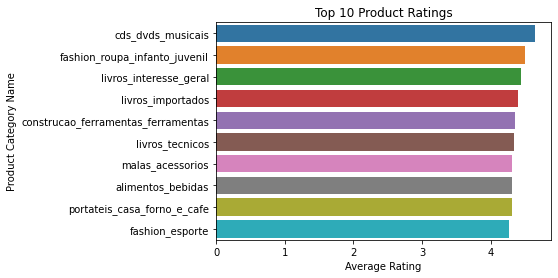

In [45]:
sns.barplot(data = top_10_ratings, x = 'review_score', y = 'product_category_name')
plt.title('Top 10 Product Ratings')
plt.xlabel('Average Rating')
plt.ylabel('Product Category Name')

#### Music, dvd, and cds category have the highest average ratings. after tha infant's fashion clothes come.

Text(0, 0.5, 'Product Category Name')

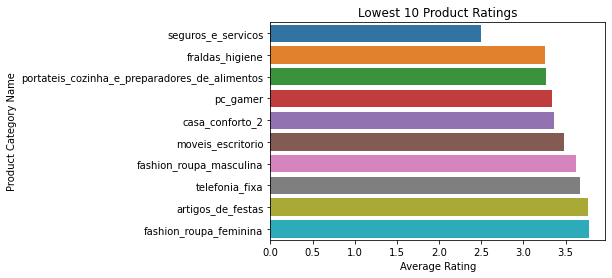

In [46]:
sns.barplot(data = lowest_10_ratings, x = 'review_score', y = 'product_category_name')
plt.title('Lowest 10 Product Ratings')
plt.xlabel('Average Rating')
plt.ylabel('Product Category Name')

#### Insurance Services have the worst ratings, followed by fraldas higiene products

In [47]:
# list print again list of all datasets
list_of_all_datasets

['customers',
 'sellers',
 'order_reviews',
 'order_items',
 'products',
 'geolocation',
 'product_category',
 'orders',
 'payments']

In [48]:
geolocation.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [49]:
geolocation.isnull().sum()

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

In [50]:
len(geolocation.geolocation_city.unique())

8011

#### There are 8011 unique city from geolocation data.